In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import PCA
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
data = pickle.load(open('/content/gdrive/MyDrive/AIL_project/data/data_images_300_300.pickle',mode='rb'))

In [4]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_89991,pixel_89992,pixel_89993,pixel_89994,pixel_89995,pixel_89996,pixel_89997,pixel_89998,pixel_89999,status
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,...,0.545098,0.525490,0.529412,0.521569,0.533333,0.968627,0.662745,0.490196,0.505882,empty
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,...,0.247059,0.250980,0.235294,0.254902,0.254902,0.203922,0.207843,0.223529,0.227451,empty
2,0.501961,0.525490,0.525490,0.501961,0.517647,0.525490,0.501961,0.482353,0.431373,0.400000,...,0.368627,0.360784,0.356863,0.356863,0.364706,0.368627,0.364706,0.360784,0.356863,empty
3,0.992157,0.992157,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.988235,0.988235,...,0.392157,0.376471,0.392157,0.388235,0.376471,0.376471,0.392157,0.388235,0.388235,empty
6,0.764706,0.823529,0.819608,0.815686,0.807843,0.807843,0.811765,0.807843,0.807843,0.807843,...,0.278431,0.466667,0.639216,0.611765,0.603922,0.611765,0.623529,0.400000,0.384314,empty


# Eigen Image

In [5]:
X = data.drop('status',axis=1).values

In [6]:
X

array([[1.        , 1.        , 1.        , ..., 0.6627451 , 0.49019608,
        0.50588235],
       [1.        , 1.        , 1.        , ..., 0.20784314, 0.22352941,
        0.22745098],
       [0.50196078, 0.5254902 , 0.5254902 , ..., 0.36470588, 0.36078431,
        0.35686275],
       ...,
       [0.76470588, 0.82352941, 0.81960784, ..., 0.54901961, 0.54117647,
        0.50196078],
       [0.00784314, 0.00784314, 0.00784314, ..., 0.07843137, 0.05882353,
        0.02352941],
       [0.09411765, 0.09411765, 0.09411765, ..., 0.09411765, 0.09411765,
        0.09411765]])

In [7]:
mean_image = X.mean(axis=0) # flatten mean image
mean_image.shape

(90000,)

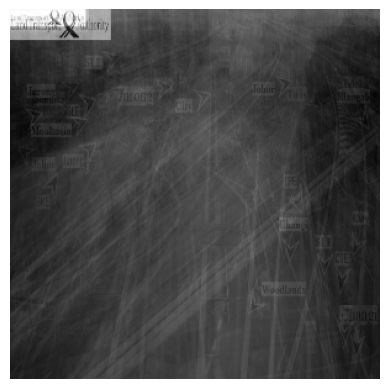

In [8]:
plt.imshow(mean_image.reshape((300,300)),cmap='gray')
plt.axis('off')
plt.show()

# Subtract Data with Mean Image

In [9]:
X_t = X - mean_image

In [10]:
X_t.shape

(3020, 90000)

**Apply X_t data to PCA**

- Find the right number of component - Elbow
- With right number compnent computer Principal components

In [11]:
pca_50 = PCA(n_components=50,whiten=True,svd_solver='auto')
pca_data = pca_50.fit_transform(X_t)

In [12]:
pca_data.shape

(3020, 50)

In [13]:
# saving data and models
y = data['status'].values # independent variables
np.savez('/content/gdrive/MyDrive/AIL_project/data/data_pca_50_target',pca_data,y)

In [14]:
pca_dict = {'pca':pca_50,'mean_image':mean_image}

In [15]:
pickle.dump(pca_dict,open('/content/gdrive/MyDrive/AIL_project/model/pca_dict.pickle','wb'))

# Visualize Eigen Image

In [16]:
pca_data_inv = pca_50.inverse_transform(pca_data)

In [17]:
pca_data_inv.shape

(3020, 90000)

In [19]:
eig_img = pca_data_inv[0,:].reshape((300,300))
eig_img.shape

(300, 300)

(-0.5, 299.5, 299.5, -0.5)

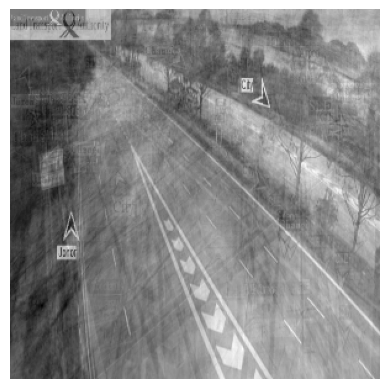

In [20]:
plt.imshow(eig_img,cmap='gray')
plt.axis('off')

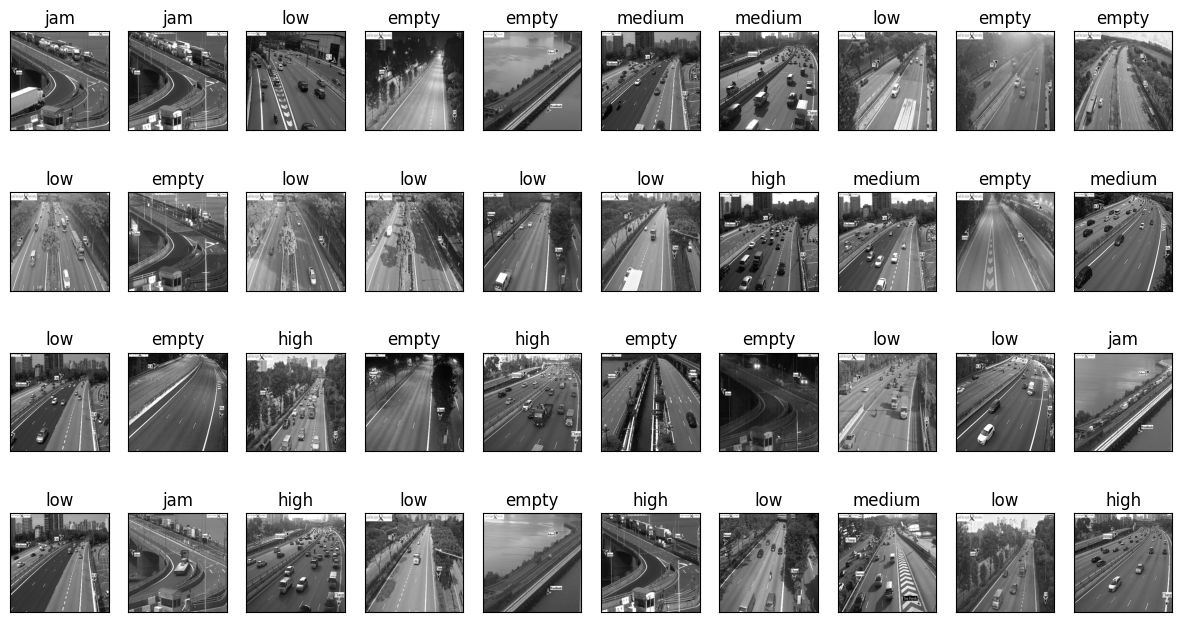

====================Eigen Images====================


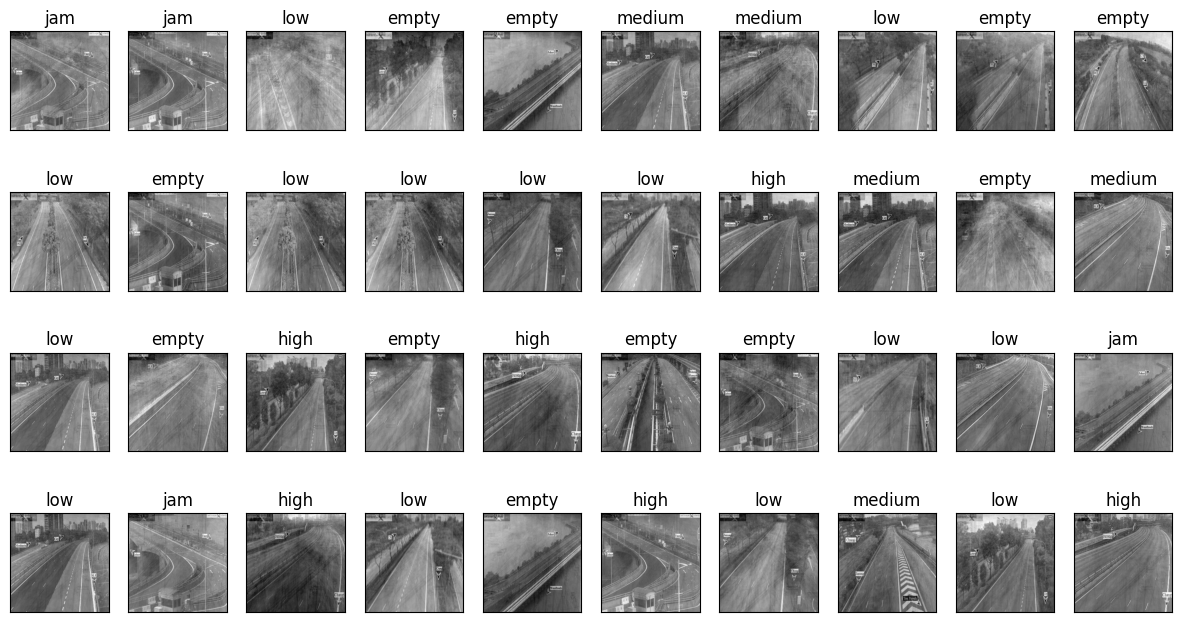

In [21]:
np.random.seed(1001)
pics = np.random.randint(0,3020,40)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic:pic+1].reshape(300,300)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(y[pic]))
    plt.xticks([])
    plt.yticks([])
plt.show()

print("="*20+'Eigen Images'+"="*20)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = pca_data_inv[pic:pic+1].reshape(300,300)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(y[pic]))
    plt.xticks([])
    plt.yticks([])

plt.show()